In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#设置中文编码和负号的正常显示
plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False  #  如果显示的数据是有负号的话  会正常的显示 

In [2]:
df = pd.read_csv('./数据集/电子产品销售分析.csv')
df.head() # 看到unnamed  会想到 我肯定会把他删除 inplace =  True

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东


In [5]:
df.describe()

,Unnamed: 0,order_id,product_id,category_id,price,user_id,age
count,5.641690e+05,5.641690e+05,5.641690e+05,5.641690e+05,564169.000000,5.641690e+05,564169.000000
mean,1.792965e+06,2.370552e+18,1.695711e+18,2.272919e+18,208.269324,1.515916e+18,33.184388
std,7.745342e+05,2.025138e+16,3.290688e+17,2.158282e+16,304.559875,2.379056e+07,10.122088
min,0.000000e+00,2.294360e+18,1.515966e+18,2.268105e+18,0.000000,1.515916e+18,16.000000
25%,1.658965e+06,2.353294e+18,1.515966e+18,2.268105e+18,23.130000,1.515916e+18,24.000000
50%,1.861597e+06,2.376886e+18,1.515966e+18,2.268105e+18,87.940000,1.515916e+18,33.000000
75%,2.473370e+06,2.388441e+18,1.515966e+18,2.268105e+18,277.750000,1.515916e+18,42.000000
max,2.633520e+06,2.388441e+18,2.388434e+18,2.374499e+18,18328.680000,1.515916e+18,50.000000


In [17]:
df['event_time'].str[:19]

0         2020-04-24 11:50:39
1         2020-04-24 11:50:39
2         2020-04-24 14:37:43
3         2020-04-24 14:37:43
4         2020-04-24 19:16:21
5         2020-04-26 08:45:57
6         2020-04-26 09:33:47
7         2020-04-26 09:33:47
8         2020-04-26 09:33:47
9         2020-04-26 09:33:47
10        2020-04-26 14:55:26
11        2020-04-26 23:35:39
12        2020-04-27 07:24:51
13        2020-04-27 14:57:22
14        2020-04-27 14:57:22
15        2020-04-27 14:57:22
16        2020-04-28 02:21:45
17        2020-04-28 03:47:48
18        2020-04-28 04:25:00
19        2020-04-28 04:25:00
20        2020-04-28 09:01:47
21        2020-04-28 09:01:47
22        2020-04-28 11:36:47
23        2020-04-28 11:36:47
24        2020-04-28 11:36:47
25        2020-04-29 03:25:12
26        2020-04-29 03:25:12
27        2020-04-29 04:46:39
28        2020-04-29 06:20:39
29        2020-04-29 06:20:39
                 ...         
564139    2020-11-21 09:44:10
564140    2020-11-21 09:46:42
564141    

In [18]:
#数据清洗和处理
#数据类型转化  注意先把转化成字符串   0- 18  2020-04-24 11:50:39 
df['event_time'] = pd.to_datetime(df['event_time'].str[:19], format="%Y-%m-%d %H:%M:%S") #  此时大小写必须这么写  
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 12 columns):
Unnamed: 0       564169 non-null int64
event_time       564169 non-null datetime64[ns]
order_id         564169 non-null int64
product_id       564169 non-null int64
category_id      564169 non-null float64
category_code    434799 non-null object
brand            536945 non-null object
price            564169 non-null float64
user_id          564169 non-null float64
age              564169 non-null float64
sex              564169 non-null object
local            564169 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 51.7+ MB


In [19]:
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东


In [20]:
#计算时间变量
df['Month'] = df['event_time'].dt.month
df['Day'] = df['event_time'].dt.day
df['hour'] = df['event_time'].dt.hour

In [21]:
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,hour
0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11
1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11
2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14
3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14
4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,19


In [23]:
df.isnull().sum()

Unnamed: 0            0
event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
Month                 0
Day                   0
hour                  0
dtype: int64

In [24]:
df['category_code'].fillna('missing',inplace=True)
df['brand'].fillna('missing',inplace=True)
df.isnull().sum()

Unnamed: 0       0
event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
age              0
sex              0
local            0
Month            0
Day              0
hour             0
dtype: int64

In [25]:
df.drop('Unnamed: 0',axis= 1, inplace= True)

In [27]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,hour
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,missing,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,19


In [28]:
df.duplicated()

0         False
1          True
2         False
3          True
4         False
5         False
6         False
7          True
8          True
9          True
10        False
11        False
12        False
13        False
14         True
15         True
16        False
17        False
18        False
19         True
20        False
21         True
22        False
23         True
24         True
25        False
26         True
27        False
28        False
29         True
          ...  
564139    False
564140    False
564141    False
564142    False
564143    False
564144    False
564145    False
564146    False
564147    False
564148    False
564149    False
564150    False
564151    False
564152    False
564153    False
564154    False
564155    False
564156    False
564157    False
564158    False
564159    False
564160    False
564161    False
564162    False
564163    False
564164    False
564165    False
564166    False
564167    False
564168    False
Length: 564169, dtype: b

In [29]:
#找出重复值有哪些 
df[df.duplicated()]


,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,hour
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14
7,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京,4,26,9
8,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京,4,26,9
9,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,21.0,男,北京,4,26,9
14,2020-04-27 14:57:22,2296628237930857206,1515966223509089660,2.268105e+18,computers.components.cpu,intel,91.41,1.515916e+18,49.0,女,浙江,4,27,14
15,2020-04-27 14:57:22,2296628237930857206,1515966223509089660,2.268105e+18,computers.components.cpu,intel,91.41,1.515916e+18,49.0,女,浙江,4,27,14
19,2020-04-28 04:25:00,2297034737199350540,1515966223509719628,2.268106e+18,missing,missing,6.94,1.515916e+18,37.0,女,北京,4,28,4
21,2020-04-28 09:01:47,2297174044555871159,2273948222957290212,2.268105e+18,computers.peripherals.monitor,samsung,254.61,1.515916e+18,27.0,女,上海,4,28,9
23,2020-04-28 11:36:47,2297252054407578606,2273948303177548033,2.268105e+18,computers.peripherals.printer,epson,164.33,1.515916e+18,48.0,女,江苏,4,28,11


In [30]:
df.drop_duplicates(inplace= True)   

In [33]:
df[df.duplicated()]  # 没有重复值了 

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,hour


In [37]:
df[df['price']>0].groupby('Month')

In [42]:
df[df['price']>0].groupby('Month').get_group(1)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,hour
28786,1970-01-01 00:33:40,2340102749292593592,1515966223509117555,2.268105e+18,appliances.environment.vacuum,dyson,752.29,1.515916e+18,25.0,女,广东,1,1,0
28787,1970-01-01 00:33:40,2340102751549129159,1515966223509088613,2.268105e+18,electronics.audio.headphone,apple,203.68,1.515916e+18,25.0,女,广东,1,1,0
28788,1970-01-01 00:33:40,2340102752874529229,1515966223509090236,2.268105e+18,appliances.iron,maxwell,18.50,1.515916e+18,25.0,女,广东,1,1,0
28789,1970-01-01 00:33:40,2340102757278548454,1515966223510225811,2.268105e+18,missing,neo,11.55,1.515916e+18,25.0,女,广东,1,1,0
28790,1970-01-01 00:33:40,2340102758385844716,1515966223509353621,2.268105e+18,missing,huawei,69.42,1.515916e+18,25.0,女,广东,1,1,0
28791,1970-01-01 00:33:40,2340102760952758778,1515966223509123234,2.268105e+18,appliances.kitchen.meat_grinder,moulinex,99.51,1.515916e+18,25.0,女,广东,1,1,0
28792,1970-01-01 00:33:40,2340102760952758778,1515966223509117345,2.268105e+18,missing,remington,19.65,1.515916e+18,25.0,女,广东,1,1,0
28793,1970-01-01 00:33:40,2340102760952758778,1515966223509089743,2.268105e+18,appliances.environment.vacuum,philips,138.87,1.515916e+18,25.0,女,广东,1,1,0
28794,1970-01-01 00:33:40,2340102769022599715,1515966223509131575,2.268105e+18,missing,canon,317.11,1.515916e+18,37.0,男,上海,1,1,0
28795,1970-01-01 00:33:40,2340102771279135278,1515966223509106026,2.268105e+18,electronics.clocks,samsung,162.01,1.515916e+18,25.0,女,广东,1,1,0


In [43]:
df[df['price']>0].groupby('Month').size()

Month
1      15575
2      17990
3      18687
4      11850
5      40239
6      41319
7      76248
8      99892
9      70441
10    103917
11     67298
dtype: int64

Text(0.5, 1.0, '每月订单数量')

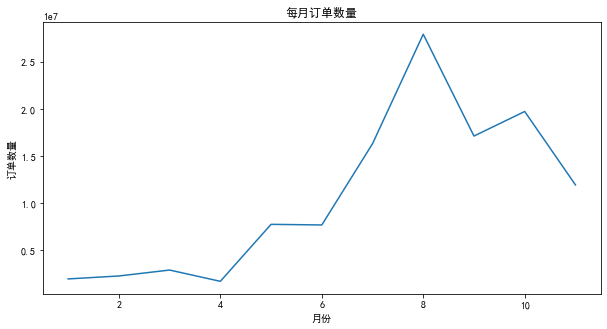

In [44]:
# 画出每月成交金额折线图

plt.figure(figsize=(10,5))
# 进行月份的分组 查看数据 list方法 和 size groups   get_group  
plt.plot(df[df['price']>0].groupby('Month')['price'].sum())
plt.xlabel('月份')
plt.ylabel('订单数量')
plt.title('每月订单数量')



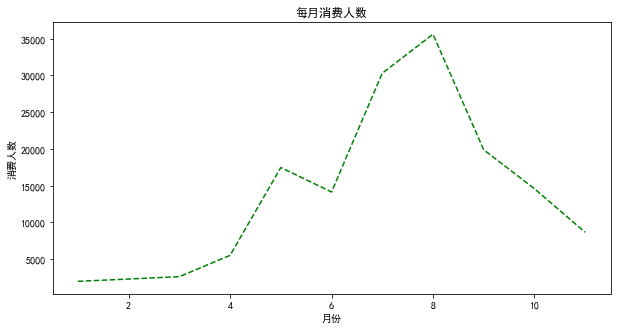

Month
1      1987
2      2298
3      2623
4      5518
5     17473
6     14145
7     30306
8     35611
9     19885
10    14592
11     8660
Name: user_id, dtype: int64

In [45]:
#每月消费人数的折线图
plt.figure(figsize=(10, 5))
plt.plot(df[df['price'] > 0].groupby('Month')['user_id'].nunique(),
         linestyle='--',
         color='g')
plt.xlabel('月份')
plt.ylabel('消费人数')
plt.title('每月消费人数')
plt.show()
df[df['price'] > 0].groupby('Month')['user_id'].nunique()

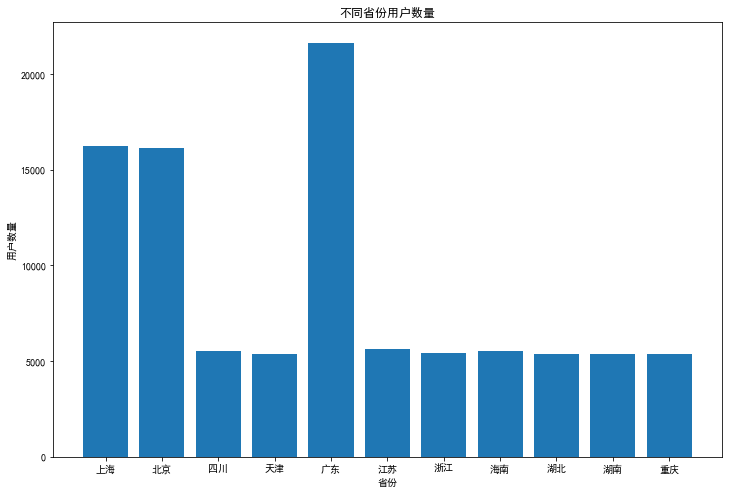

In [46]:
# 不同省份用户数量的柱状图
plt.figure(figsize=(12,8))

groups = df[df['price']>0].groupby('local')  # 注意 是元组的形式 
l_provice = [i[0] for  i in groups ]  # 遍历出来省份 

user_sum = df[df['price']>0].groupby('local')['user_id'].nunique()

plt.bar(l_provice,user_sum)

plt.xlabel('省份')
plt.ylabel('用户数量')
plt.title('不同省份用户数量')
plt.show()

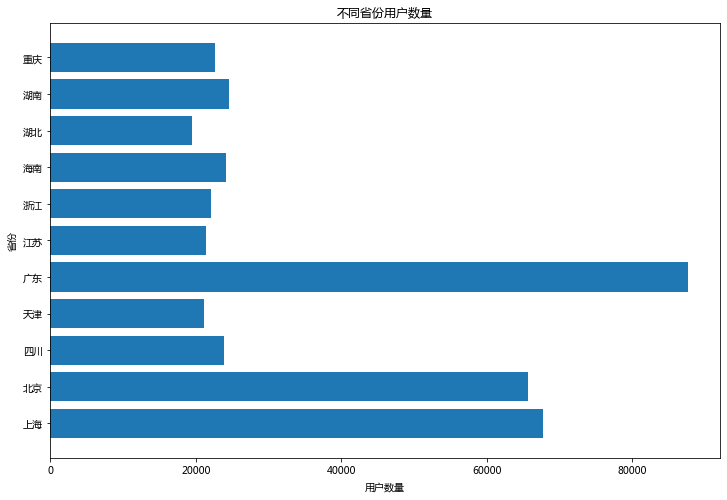

In [33]:
# 不同省份订单数量的水平柱状图
plt.figure(figsize=(12,8))

groups = df[df['price']>0].groupby('local')
l_provice = [i[0] for  i in groups ]

user_sum = df[df['price']>0].groupby('local')['order_id'].nunique()

plt.barh(l_provice,user_sum)

plt.xlabel('用户数量')
plt.ylabel('省份')
plt.title('不同省份用户数量')
plt.show()



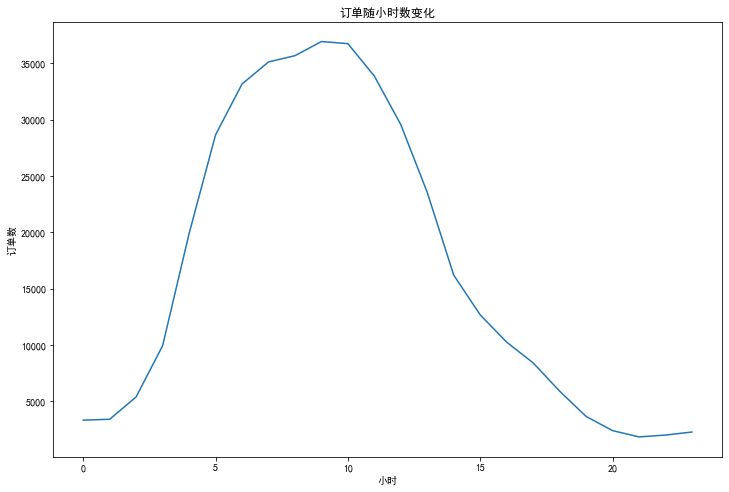

hour
0      3310
1      3386
2      5376
3      9922
4     19879
5     28647
6     33161
7     35121
8     35678
9     36933
10    36746
11    33865
12    29548
13    23523
14    16182
15    12655
16    10233
17     8393
18     5884
19     3638
20     2378
21     1821
22     1982
23     2255
Name: order_id, dtype: int64

In [47]:
# 每小时订单分布的折线图

plt.figure(figsize=(12, 8))
plt.plot(df[df['price'] > 0].groupby('hour')['order_id'].nunique())
plt.xlabel('小时')
plt.ylabel('订单数')
plt.title('订单随小时数变化')
plt.show()

df[df['price'] > 0].groupby('hour')['order_id'].nunique()

In [48]:
#  查看未完成订单的数量
df[df['price']==0].count()

event_time       39
order_id         39
product_id       39
category_id      39
category_code    39
brand            39
price            39
user_id          39
age              39
sex              39
local            39
Month            39
Day              39
hour             39
dtype: int64

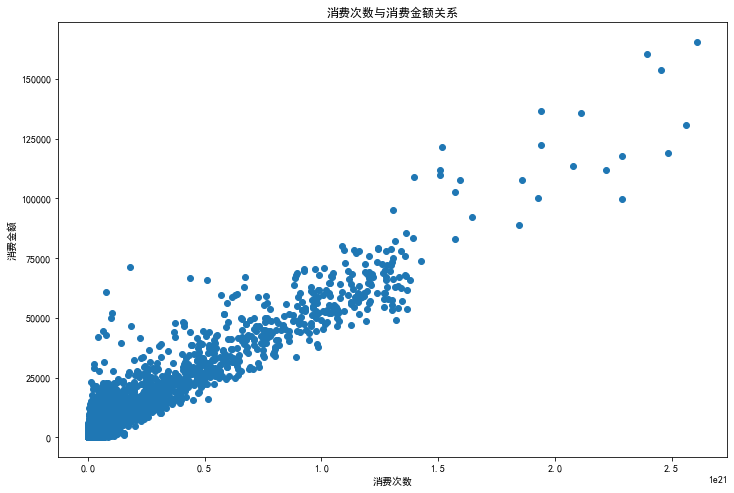

In [49]:
# 每个用户消费次数与消费金额关系的散点图

plt.figure(figsize=(12, 8))
plt.scatter(x=df[df['price'] > 0].groupby('user_id')['order_id'].sum(),
            y=df[df['price'] > 0].groupby('user_id')['price'].sum())
plt.xlabel('消费次数')
plt.ylabel('消费金额')
plt.title('消费次数与消费金额关系')
plt.show()

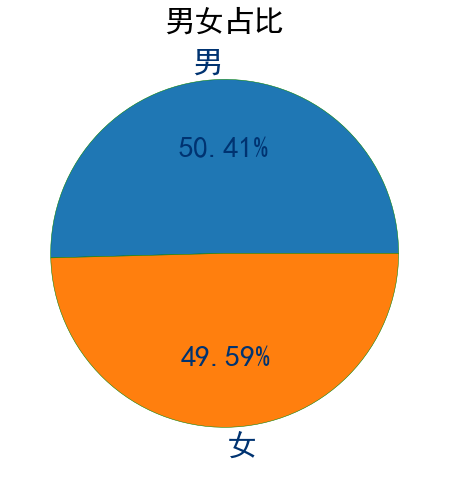

In [50]:
#用户男女人数对比扇形图

df_sex = df['sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(df_sex.values,
        labels=df_sex.index,
        autopct='%.2f%%',
        wedgeprops={
            'linewidth': 0.5,
            'edgecolor': 'green'
        },
        textprops={
            'fontsize': 30,
            'color': '#003371'
        })
plt.title('男女占比', size=30)
plt.show()

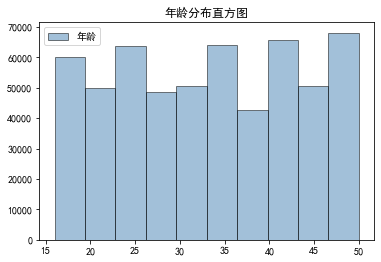

In [52]:
#  年龄分布直方图
df = df[df['price'] > 0]
plt.hist(df['age'],
         bins=10,
         color='steelblue',
         edgecolor='k',
         label='年龄',
         alpha=0.5)
plt.title('年龄分布直方图')
plt.legend()

plt.show()

In [56]:
# 将年龄离散化，增加一列age_box   cut 函数 

bins = [10,20,30,40,50]
labels = ['10-20','20-30','30-40','40-50']  
df['age_box'] = pd.cut(df['age'], bins, labels=labels)
age_box = df['age_box'].value_counts()
age_box

40-50    169388
20-30    159539
30-40    156363
10-20     78166
Name: age_box, dtype: int64

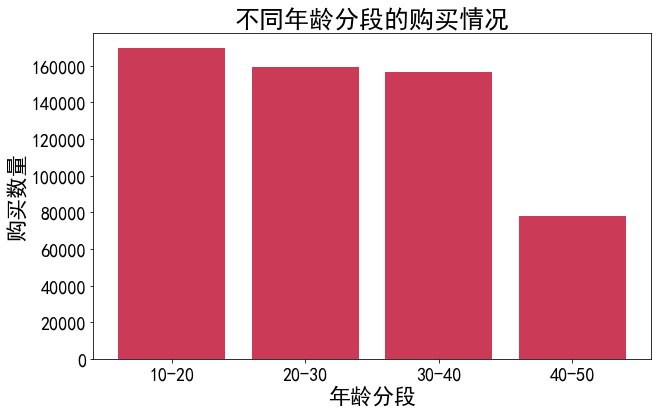

In [57]:
# 不同年龄段与购买数量的关系，画出柱状图

plt.figure(figsize=(10,6))
plt.bar(labels, age_box.values, color='#cb3a56')
plt.ylabel('购买数量', size=22)
plt.xlabel('年龄分段', size=22)
plt.xticks(size=18)
plt.yticks(size=18)

plt.title('不同年龄分段的购买情况', size=25)
plt.show()

Text(0.5, 1.0, '每月订单数量')

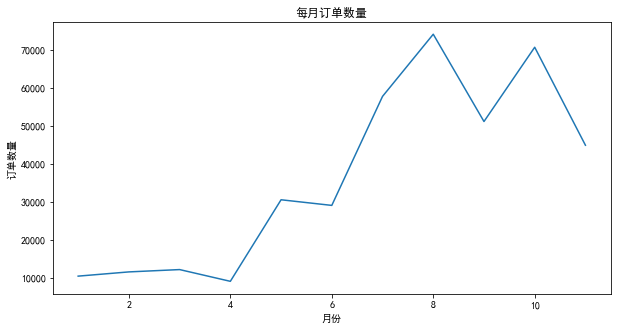

In [58]:
# 每月订单数量折线图 

plt.figure(figsize=(10,5))
plt.plot(df[df['price']>0].groupby('Month')['order_id'].nunique())
plt.xlabel('月份')
plt.ylabel('订单数量')
plt.title('每月订单数量')

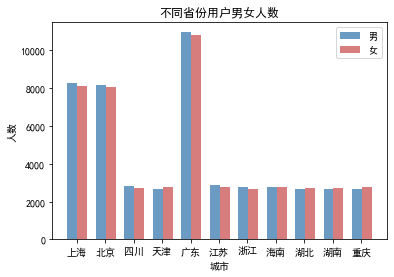

[8237, 8152, 2844, 2637, 10938, 2851, 2751, 2761, 2674, 2663, 2644]

In [64]:
# 不同省份用户男女人数对比簇状柱形图¶

df1 = df[df['price'] > 0]
city = list(
    (df1[df1['sex'] == '男'].groupby('local')['user_id'].nunique()).index)
df_m = list(df1[df1['sex'] == '男'].groupby('local')['user_id'].nunique())
df_w = list(df1[df1['sex'] == '女'].groupby('local')['user_id'].nunique())

bar_width = 0.35
x = np.arange(len(city))

plt.bar(x, df_m, label='男', color='steelblue', alpha=0.8, width=bar_width)
plt.bar(x + bar_width,
        df_w,
        label='女',
        color='indianred',
        alpha=0.8,
        width=bar_width)

plt.xlabel('城市')
plt.ylabel('人数')
plt.title('不同省份用户男女人数')
plt.xticks(x + 0.15, city)
plt.legend()

plt.show()
df_m

In [65]:
df1[df1['sex'] == '男'].groupby('local')['user_id'].nunique()

local
上海     8237
北京     8152
四川     2844
天津     2637
广东    10938
江苏     2851
浙江     2751
海南     2761
湖北     2674
湖南     2663
重庆     2644
Name: user_id, dtype: int64